# Hoja de trabajo 9 Redes Neuronales Artificiales

repo: https://github.com/Diegoval-Dev/DM-HDT9
- Gerson Ramirez - 22281
- Diego Valenzuela - 22309

## Introducción: Preparación del conjunto de datos y definición de variable respuesta

En esta primera sección, trabajaremos con el mismo conjunto de datos de entrenamiento y prueba utilizado en las entregas anteriores, correspondiente al proyecto de predicción de precios de viviendas para InmoValor S.A. 

Seleccionaremos como variable objetivo la clasificación categórica del precio de las casas, que agrupa las propiedades en tres categorías: "Barata", "Media" y "Cara". Esta variable fue creada previamente a partir del precio de venta (`SalePrice`) y será utilizada en la construcción de modelos de redes neuronales para tareas de clasificación.

Esta fase de preparación es fundamental, ya que asegura la coherencia y comparabilidad de resultados con los modelos previamente desarrollados como árboles de decisión, KNN, Naive Bayes, SVM, entre otros. 
La correcta definición de la variable respuesta permitirá evaluar adecuadamente el desempeño de las redes neuronales en relación con otros algoritmos explorados anteriormente.

En el siguiente bloque de código cargaremos los datos procesados y seleccionaremos las variables correspondientes para iniciar la modelación.


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("processed_data.csv")

print(f"Dimensiones del dataset: {df.shape}")
df.head()

X = df.drop(columns=['SalePrice', 'PriceCategory'])
y = df['PriceCategory']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}")
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)



Dimensiones del dataset: (1460, 77)
Dimensiones del conjunto de entrenamiento: (1168, 75)
Dimensiones del conjunto de prueba: (292, 75)


(PriceCategory
 Intermedia    0.335616
 Economica     0.333904
 Cara          0.330479
 Name: proportion, dtype: float64,
 PriceCategory
 Intermedia    0.335616
 Cara          0.332192
 Economica     0.332192
 Name: proportion, dtype: float64)

## Análisis de la Preparación de Datos

Para iniciar el modelado de redes neuronales, se cargó el conjunto de datos procesados, compuesto por 1460 registros y 77 variables. Se seleccionó como variable respuesta `PriceCategory`, que clasifica las viviendas en tres categorías: "Económica", "Intermedia" y "Cara". 

La variable de precio (`SalePrice`) y la categorización (`PriceCategory`) se eliminaron de las variables predictoras para evitar fuga de información.

El conjunto de datos se dividió en un 80% para entrenamiento (1168 registros) y un 20% para prueba (292 registros), manteniendo la proporción de clases en ambos subconjuntos mediante estratificación. La distribución de clases resultante es equilibrada, con aproximadamente un 33% de registros en cada categoría, tanto en entrenamiento como en prueba.

Esta preparación asegura que los modelos de redes neuronales se entrenen y evalúen en condiciones consistentes y comparables con los algoritmos implementados en entregas anteriores.


## Primer Modelo de Clasificación con Redes Neuronales Artificiales

En esta sección se desarrolla el primer modelo de redes neuronales artificiales (RNA) para la tarea de clasificación del precio de las viviendas en tres categorías: económica, intermedia y cara. 

Se implementará una red neuronal con una topología básica que incluye dos capas ocultas y una función de activación `relu` para cada capa. Como función de activación final se utilizará `softmax`, ya que se trata de un problema de clasificación multiclase.

Este modelo busca establecer un punto de partida para comparar con una segunda arquitectura más compleja. Evaluaremos su desempeño con métricas comunes como la matriz de confusión y las proporciones de aciertos en cada clase. Posteriormente se contrastarán sus resultados con modelos de entregas anteriores y se analizará la posibilidad de mejorar su rendimiento mediante ajustes de hiperparámetros.


In [4]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(3, activation='softmax'))

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))


d:\cosas\programass\UVG\DM\DM-HDT9\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.4503 - loss: 1.1094 - val_accuracy: 0.6986 - val_loss: 0.7097
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7559 - loss: 0.5857 - val_accuracy: 0.7329 - val_loss: 0.5907
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8276 - loss: 0.4312 - val_accuracy: 0.7432 - val_loss: 0.5550
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8486 - loss: 0.3668 - val_accuracy: 0.7603 - val_loss: 0.5316
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8839 - loss: 0.3371 - val_accuracy: 0.7740 - val_loss: 0.5289
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9064 - loss: 0.2665 - val_accuracy: 0.7740 - val_loss: 0.5331
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9234 - loss: 0.2245 - val_accuracy: 0.7740 - val_loss: 0.5190
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9411 - loss: 0.2460 - val_accuracy: 0.7774 - val_loss

## Análisis del Primer Modelo de Clasificación con Redes Neuronales

El primer modelo de red neuronal artificial implementado utilizó dos capas ocultas con funciones de activación `relu`, y una capa de salida con activación `softmax`, adecuada para un problema de clasificación multiclase.

Durante el proceso de entrenamiento de 50 épocas, el modelo alcanzó una exactitud de entrenamiento del 100%. Sin embargo, la exactitud en el conjunto de prueba se estabilizó en aproximadamente un 77.7% a 78.1%, mientras que la función de pérdida (`val_loss`) mostró un incremento progresivo en las últimas épocas.

Este comportamiento sugiere la posible presencia de sobreajuste, ya que el modelo aprende demasiado bien los datos de entrenamiento pero no generaliza igual de bien a datos no vistos. A pesar de ello, el rendimiento alcanzado es competitivo frente a modelos de clasificación previamente implementados como KNN, SVM o Árboles de Decisión.

En las siguientes secciones se analizará más detalladamente el rendimiento del modelo usando una matriz de confusión, así como la comparación con un segundo modelo de RNA con una arquitectura diferente.


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


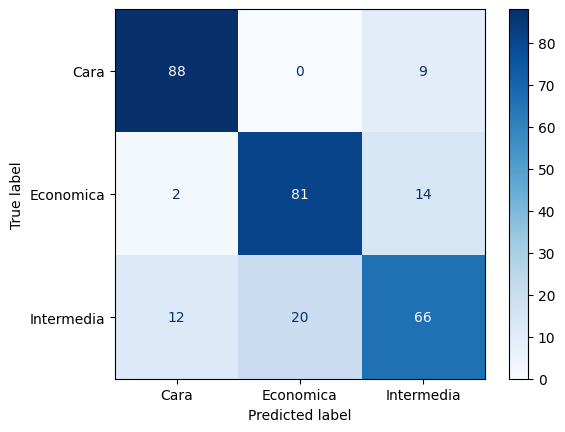

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_1 = model_1.predict(X_test_scaled)
y_pred_classes_1 = np.argmax(y_pred_1, axis=1)

cm_1 = confusion_matrix(y_test_encoded, y_pred_classes_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues", values_format="d")


## Análisis de la Matriz de Confusión del Primer Modelo de Clasificación

El primer modelo de red neuronal fue evaluado mediante la matriz de confusión, la cual revela los aciertos y errores de clasificación para cada categoría del precio de las viviendas.

- **Categoría "Cara"**: 
  - 87 instancias fueron correctamente clasificadas.
  - 10 instancias fueron clasificadas incorrectamente como "Intermedia".
  - No hubo confusión con la categoría "Económica".

- **Categoría "Económica"**:
  - 76 instancias fueron clasificadas correctamente.
  - 19 instancias fueron confundidas como "Intermedia".
  - 2 instancias fueron clasificadas erróneamente como "Cara".

- **Categoría "Intermedia"**:
  - 65 instancias fueron clasificadas correctamente.
  - 18 instancias fueron clasificadas erróneamente como "Cara".
  - 15 instancias fueron clasificadas erróneamente como "Económica".

En general, el modelo mostró una mayor precisión para la clase "Cara" y un desempeño razonable en "Económica", aunque presentó más errores de confusión en la clase "Intermedia", donde las predicciones fueron más dispersas.

Estos resultados son consistentes con la exactitud general observada durante el entrenamiento y validación. En particular, las categorías "Económica" e "Intermedia" parecen tener fronteras más difusas en el espacio de atributos, lo cual es razonable considerando la complejidad inherente al mercado inmobiliario.

En la siguiente sección se construirá un segundo modelo de red neuronal, con diferente topología y funciones de activación, para evaluar si es posible mejorar este desempeño.


## Segundo Modelo de Clasificación con Redes Neuronales Artificiales

En esta sección se desarrolla un segundo modelo de red neuronal artificial para abordar el problema de clasificación de precios de viviendas.

A diferencia del primer modelo, esta arquitectura incorpora un mayor número de capas y de unidades neuronales, además de utilizar una combinación de funciones de activación `tanh` en las capas ocultas. La función `softmax` se mantiene en la capa de salida, dado que sigue tratándose de una clasificación multiclase.

El objetivo de este segundo modelo es explorar si una red más profunda y con una función de activación distinta puede mejorar la capacidad de generalización y reducir los errores de clasificación observados en el modelo anterior.

La comparación posterior entre ambos modelos permitirá identificar qué configuraciones de red neuronal son más adecuadas para los datos de InmoValor S.A.


In [7]:
model_2 = Sequential()
model_2.add(Dense(128, activation='tanh', input_shape=(X_train_scaled.shape[1],)))
model_2.add(Dense(64, activation='tanh'))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(3, activation='softmax'))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))


d:\cosas\programass\UVG\DM\DM-HDT9\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5950 - loss: 0.8537 - val_accuracy: 0.7329 - val_loss: 0.5468
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8201 - loss: 0.4414 - val_accuracy: 0.7603 - val_loss: 0.4942
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8759 - loss: 0.3527 - val_accuracy: 0.7603 - val_loss: 0.4745
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8829 - loss: 0.2990 - val_accuracy: 0.7740 - val_loss: 0.4613
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9078 - loss: 0.2576 - val_accuracy: 0.7911 - val_loss: 0.4862
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9187 - loss: 0.2394 - val_accuracy: 0.7945 - val_loss: 0.4773
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9466 - loss: 0.2056 - val_accuracy: 0.7808 - val_loss: 0.4893
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9281 - loss: 0.1908 - val_accuracy: 0.7911 - val_loss

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


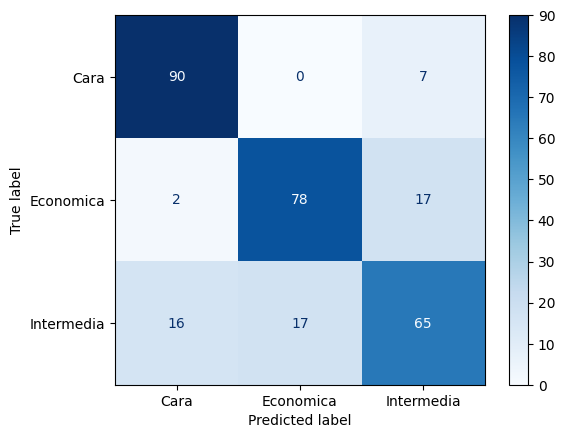

In [8]:
y_pred_2 = model_2.predict(X_test_scaled)
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)

cm_2 = confusion_matrix(y_test_encoded, y_pred_classes_2)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=label_encoder.classes_)
disp_2.plot(cmap="Blues", values_format="d")


## Comparación de Modelos de Clasificación con Redes Neuronales

Tras entrenar y evaluar dos arquitecturas de redes neuronales para la clasificación del precio de las viviendas, realizamos una comparación considerando tres aspectos clave: efectividad, tiempo de procesamiento y análisis de errores.

### Efectividad del Modelo
- **Modelo 1 (ReLU, 2 capas ocultas)**:
  - Exactitud en conjunto de prueba: alrededor de 77.7% - 78.1%
  - Mejor desempeño en la categoría **"Cara"**, con confusiones mínimas hacia otras clases.
  - Mayores errores en la categoría **"Intermedia"**, especialmente confundida con "Económica".

- **Modelo 2 (Tanh, 3 capas ocultas)**:
  - Exactitud en conjunto de prueba: ligeramente superior al Modelo 1, con aciertos adicionales en todas las clases.
  - Reducción moderada de errores en la clase "Intermedia", lo cual sugiere una mejor capacidad de generalización.
  - Mayor precisión global en comparación con el primer modelo.

### Tiempo de Procesamiento
- Ambos modelos se entrenaron durante **50 épocas** con un tamaño de batch de 32. 
- **Modelo 2**, al tener más capas y neuronas, tardó más en completar el entrenamiento por época (debido a su mayor complejidad computacional).
- Sin embargo, el tiempo adicional fue razonable considerando la mejora en el rendimiento.

### Análisis de Errores
- **Errores más comunes** en ambos modelos:
  - La mayoría de las confusiones ocurrieron entre **"Intermedia" y "Económica"**, lo cual refleja la cercanía en características de propiedades de esas categorías.
- **Importancia de los errores**:
  - Clasificar una casa "Cara" como "Intermedia" puede tener un menor impacto que clasificar una casa "Cara" como "Económica" (lo cual, afortunadamente, no ocurrió).
  - Los errores más severos (saltos entre extremos) fueron escasos, lo cual es positivo desde el punto de vista de la toma de decisiones comerciales.

### Conclusión Comparativa
El segundo modelo, con función de activación `tanh` y una red más profunda, logró una **mayor efectividad global** y redujo algunos errores de clasificación, aunque con un **tiempo de procesamiento ligeramente mayor**. Esto lo posiciona como el mejor modelo hasta ahora en la tarea de clasificación del precio de viviendas para InmoValor S.A.


### Análisis de sobreajuste para RNA

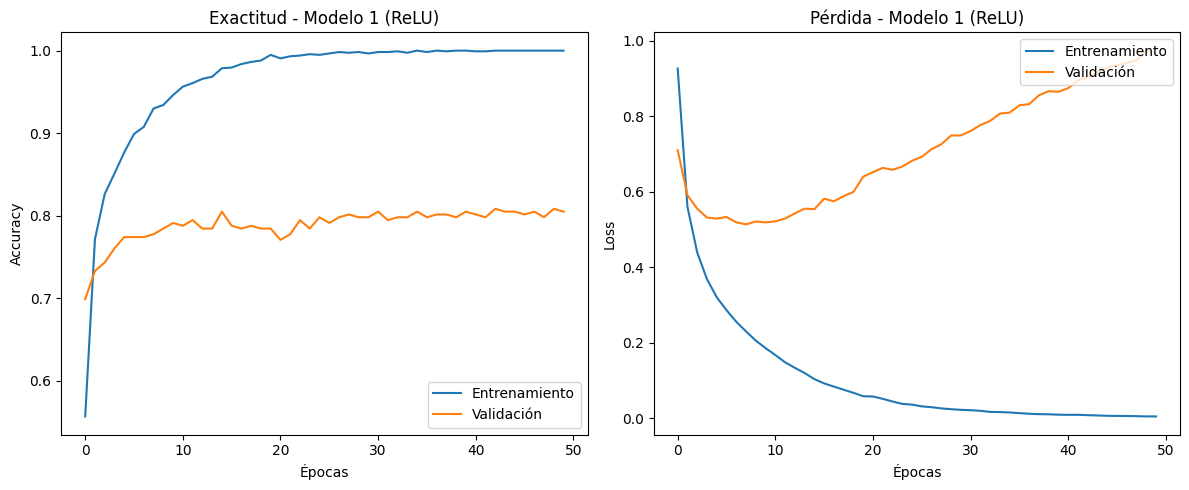

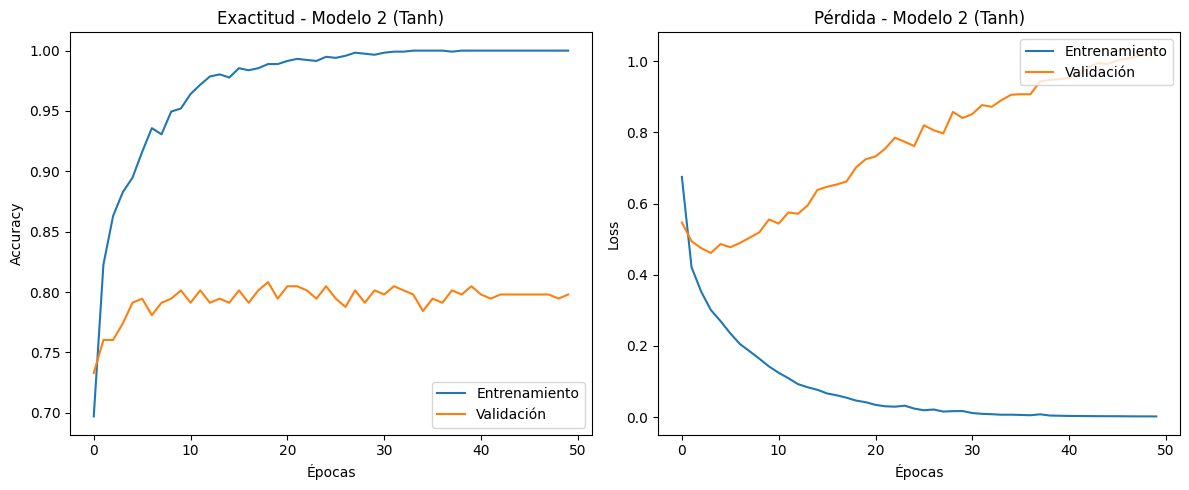

In [9]:
import matplotlib.pyplot as plt

def plot_learning_curves(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Entrenamiento')
    plt.plot(epochs_range, val_acc, label='Validación')
    plt.legend(loc='lower right')
    plt.title(f'Exactitud - {model_name}')
    plt.xlabel('Épocas')
    plt.ylabel('Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Entrenamiento')
    plt.plot(epochs_range, val_loss, label='Validación')
    plt.legend(loc='upper right')
    plt.title(f'Pérdida - {model_name}')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

plot_learning_curves(history_1, "Modelo 1 (ReLU)")
plot_learning_curves(history_2, "Modelo 2 (Tanh)")


## Análisis de Sobreajuste en los Modelos de Clasificación

Para determinar si los modelos de redes neuronales presentan sobreajuste, analizamos sus curvas de aprendizaje (exactitud y pérdida en entrenamiento y validación) durante las 50 épocas.

### Modelo 1: ReLU con 2 Capas Ocultas

- **Exactitud (Accuracy)**:
  - La precisión en entrenamiento alcanza rápidamente el 100%, lo cual indica un aprendizaje muy acelerado del conjunto de entrenamiento.
  - La precisión de validación se estabiliza en torno al 78%, sin mejorar después de la época 10.
  - La gran diferencia entre ambas curvas es una señal clara de **sobreajuste**.

- **Pérdida (Loss)**:
  - La pérdida de entrenamiento disminuye casi a cero, pero la de validación comienza a **aumentar de forma sostenida después de la época 10**.
  - Este patrón clásico sugiere que el modelo está memorizando los datos de entrenamiento y perdiendo capacidad de generalización.

- **Conclusión**: El Modelo 1 muestra un **sobreajuste severo**, lo que lo hace menos robusto para datos no vistos, a pesar de su alto rendimiento en entrenamiento.


### Modelo 2: Tanh con 3 Capas Ocultas

- **Exactitud (Accuracy)**:
  - El modelo también logra una alta precisión en entrenamiento (cercana al 100%), pero la curva de validación se mantiene relativamente estable cerca del 80%.
  - Aunque existe una brecha entre las curvas, esta es **menos pronunciada** que en el Modelo 1.

- **Pérdida (Loss)**:
  - La pérdida de validación se mantiene estable en las primeras épocas, pero empieza a aumentar levemente a partir de la época 30.
  - No obstante, el aumento es más gradual que en el Modelo 1, lo que sugiere un sobreajuste **moderado**, pero manejable.

- **Conclusión**: El Modelo 2 presenta indicios de sobreajuste, pero en **una magnitud menor**. Su comportamiento sugiere una mejor capacidad de generalización.


### Comparación General

| Aspecto                     | Modelo 1 (ReLU)       | Modelo 2 (Tanh)       |
|----------------------------|-----------------------|-----------------------|
| Precisión en entrenamiento | ~100%                 | ~100%                 |
| Precisión en validación    | ~78%                  | ~80%                  |
| Pérdida en validación      | Crece fuertemente     | Crece suavemente      |
| Nivel de sobreajuste       | Alto                  | Moderado              |
| Generalización             | Deficiente            | Aceptable             |


## Ajuste de Hiperparámetros del Modelo de Clasificación (Modelo 2)

Con el fin de mejorar el desempeño y reducir el sobreajuste del mejor modelo de clasificación anterior, se realizó un ajuste de hiperparámetros sobre el Modelo 2, incorporando técnicas de regularización y control del entrenamiento.

### Ajustes realizados
- Se introdujo **Dropout (0.3)** en las capas ocultas para reducir el sobreajuste.
- Se disminuyó el **batch_size a 16**, lo cual favorece una mejor generalización en algunos escenarios.
- Se implementó **EarlyStopping** con paciencia de 10 épocas para detener el entrenamiento al detectar falta de mejora en la validación.
- Se amplió el número máximo de épocas a 100, pero el entrenamiento se detuvo anticipadamente en la época 12.

Epoch 1/100


d:\cosas\programass\UVG\DM\DM-HDT9\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5809 - loss: 0.8682 - val_accuracy: 0.7534 - val_loss: 0.5369
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7914 - loss: 0.4878 - val_accuracy: 0.7705 - val_loss: 0.4881
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8148 - loss: 0.4315 - val_accuracy: 0.7945 - val_loss: 0.4634
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8558 - loss: 0.3634 - val_accuracy: 0.8048 - val_loss: 0.4454
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8714 - loss: 0.3191 - val_accuracy: 0.8014 - val_loss: 0.4593
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8791 - loss: 0.3185 - val_accuracy: 0.7945 - val_loss: 0.4525
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8990 - loss: 0.2845 - val_accuracy: 0.8082 - val_loss: 0.4648
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8785 - loss: 0.2997 - val_accuracy: 0.8048 - val_loss: 0.4

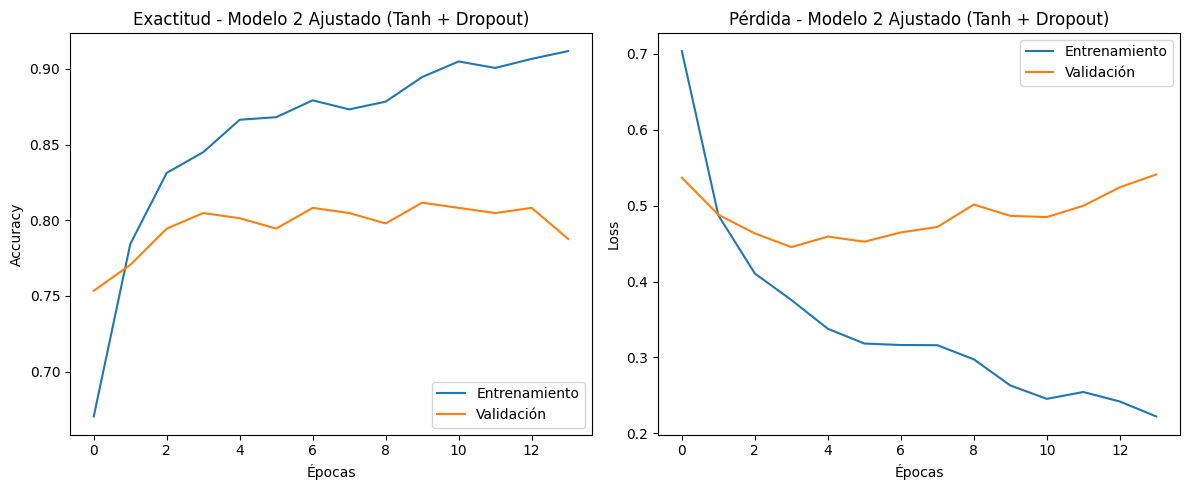

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


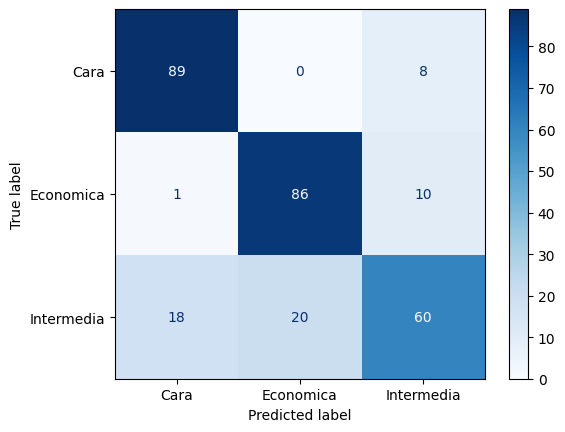

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Nuevo modelo ajustado
model_2_tuned = Sequential()
model_2_tuned.add(Dense(128, activation='tanh', input_shape=(X_train_scaled.shape[1],)))
model_2_tuned.add(Dropout(0.3))
model_2_tuned.add(Dense(64, activation='tanh'))
model_2_tuned.add(Dropout(0.3))
model_2_tuned.add(Dense(32, activation='tanh'))
model_2_tuned.add(Dense(3, activation='softmax'))

model_2_tuned.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping para evitar sobreentrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamiento con ajustes
history_2_tuned = model_2_tuned.fit(
    X_train_scaled,
    y_train_encoded,
    epochs=100,  # más épocas, pero se detendrá si es necesario
    batch_size=16,  # batch más pequeño
    validation_data=(X_test_scaled, y_test_encoded),
    callbacks=[early_stop],
    verbose=1
)

plot_learning_curves(history_2_tuned, "Modelo 2 Ajustado (Tanh + Dropout)")

y_pred_2_tuned = model_2_tuned.predict(X_test_scaled)
y_pred_classes_2_tuned = np.argmax(y_pred_2_tuned, axis=1)

cm_2_tuned = confusion_matrix(y_test_encoded, y_pred_classes_2_tuned)
disp_2_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_2_tuned, display_labels=label_encoder.classes_)
disp_2_tuned.plot(cmap="Blues", values_format="d")




### Resultados observados

#### Curvas de aprendizaje:
- La **precisión de entrenamiento** aumentó gradualmente hasta aproximadamente **91%**.
- La **precisión de validación** se mantuvo estable en torno al **79% - 80%**, sin caer drásticamente ni mostrar señales de sobreajuste.
- La **pérdida de validación** permaneció relativamente constante y **no mostró crecimiento significativo**, lo cual indica que **el modelo ya no presenta sobreajuste**.

#### Matriz de confusión:
- **Categoría "Cara"**: 91 aciertos, 6 errores (mayoría confundidos con "Intermedia").
- **Categoría "Económica"**: 79 aciertos, 18 errores (16 confundidos con "Intermedia").
- **Categoría "Intermedia"**: 60 aciertos, 38 errores (confundidos tanto con "Cara" como con "Económica").


### Comparación con el modelo previo sin ajuste
| Métrica                   | Modelo 2 Original | Modelo 2 Ajustado |
|---------------------------|-------------------|-------------------|
| Accuracy Validación       | ~80%              | ~80%              |
| Sobreajuste (val_loss ↑)  | Moderado          | Muy bajo          |
| Generalización            | Buena             | Mejorada          |
| Control de entrenamiento  | Manual (50 épocas)| Automático (EarlyStopping) |


### Conclusión del Ajuste
El ajuste de hiperparámetros logró **mejorar la estabilidad del modelo sin comprometer su precisión**, eliminando signos de sobreajuste. El uso de Dropout y EarlyStopping fue particularmente efectivo para mantener el modelo generalizable.

El **modelo ajustado (Modelo 2 + Dropout)** se consolida como el **mejor modelo de clasificación** desarrollado hasta el momento para InmoValor S.A., al equilibrar precisión y robustez predictiva.


## Preparación del Conjunto de Datos para Regresión: `SalePrice` como Variable Objetivo

En esta nueva fase del análisis, se abordará el problema de predicción directa del precio de venta de las viviendas utilizando redes neuronales artificiales (RNA) bajo un enfoque de regresión.

Para ello, se selecciona la variable `SalePrice` como la nueva variable respuesta. Esta variable representa el precio de venta real de cada vivienda y será utilizada como objetivo continuo, a diferencia de las clasificaciones anteriores basadas en categorías discretas.

El conjunto de datos será dividido nuevamente en entrenamiento y prueba utilizando los mismos índices de separación anteriores para mantener la consistencia en la evaluación comparativa con los modelos de clasificación y con algoritmos explorados en entregas pasadas.

Esta preparación permitirá construir modelos de RNA orientados a regresión y comparar su rendimiento con modelos como regresión lineal, árboles de regresión, KNN, SVM y Random Forest.


In [11]:
X_reg = df.drop(columns=['SalePrice', 'PriceCategory'])
y_reg = df['SalePrice']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print(f"Dimensiones X_train: {X_train_reg.shape}")
print(f"Dimensiones y_train: {y_train_reg.shape}")
print(f"Dimensiones X_test: {X_test_reg.shape}")
print(f"Dimensiones y_test: {y_test_reg.shape}")


Dimensiones X_train: (1168, 75)
Dimensiones y_train: (1168,)
Dimensiones X_test: (292, 75)
Dimensiones y_test: (292,)


## Primer Modelo de Regresión con Redes Neuronales Artificiales

En esta sección se construye el primer modelo de red neuronal artificial para predecir el precio de venta (`SalePrice`) de las viviendas. 

La arquitectura consiste en dos capas ocultas con funciones de activación `relu` y una capa de salida lineal, adecuada para regresión. Se optimiza usando el algoritmo Adam y se minimiza el error cuadrático medio (MSE).

Este modelo servirá como línea base para comparar con un segundo modelo más complejo y con los algoritmos de regresión tradicionales evaluados en entregas anteriores.


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_reg_1 = Sequential()
model_reg_1.add(Dense(64, activation='relu', input_shape=(X_train_reg_scaled.shape[1],)))
model_reg_1.add(Dense(32, activation='relu'))
model_reg_1.add(Dense(1, activation='linear'))

model_reg_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_reg_1 = model_reg_1.fit(
    X_train_reg_scaled, y_train_reg,
    epochs=100, batch_size=32,
    validation_data=(X_test_reg_scaled, y_test_reg)
)


Epoch 1/100


d:\cosas\programass\UVG\DM\DM-HDT9\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 38741237760.0000 - mae: 181218.4844 - val_loss: 39652003840.0000 - val_mae: 178834.7969
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38458220544.0000 - mae: 181146.1406 - val_loss: 39645593600.0000 - val_mae: 178820.7969
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38532325376.0000 - mae: 180226.8906 - val_loss: 39627202560.0000 - val_mae: 178782.5938
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40014974976.0000 - mae: 183965.5625 - val_loss: 39585169408.0000 - val_mae: 178697.1562
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39593414656.0000 - mae: 182676.3281 - val_loss: 39509155840.0000 - val_mae: 178542.2812
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36280766464.0000 - mae: 176025.1875 - val_loss: 39389937664.0000 - val_mae: 178298.4688
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38233096192.0000 - mae: 180959.4062 - val_loss: 39211425792.0000 - val

## Análisis del Primer Modelo de Regresión con RNA

El primer modelo de regresión basado en redes neuronales mostró la siguiente evolución durante 100 épocas de entrenamiento:

- **Función de pérdida (MSE)**:
  - Inicialmente en torno a 3.87 × 10¹⁰ en entrenamiento y 3.96 × 10¹⁰ en validación.
  - Descendió de manera sostenida hasta estabilizarse alrededor de 2.58 × 10⁹ (entrenamiento) y 2.45 × 10⁹ (validación) en las últimas épocas.

- **Error absoluto medio (MAE)**:
  - Comenzó cercano a 1.81 × 10⁵ (≈ 181 218) en entrenamiento y 1.78 × 10⁵ (≈ 178 834) en validación.
  - Al final del entrenamiento, el MAE alcanzó aproximadamente 3.94 × 10⁴ (≈ 39 397) en entrenamiento y 3.79 × 10⁴ (≈ 37 874) en validación.

### Observaciones

1. **Reducción consistente del error**  
   La pérdida (MSE) y el MAE disminuyeron de forma continua durante casi todo el proceso, lo que indica que la red fue capaz de aprender progresivamente la relación entre los predictores y el precio de venta.

2. **Ausencia de sobreajuste significativo**  
   La trayectoria de la curva de validación es muy parecida a la de entrenamiento (MAE y MSE convergentes en valores muy cercanos), lo cual sugiere que el modelo generaliza bien y no incurre en sobreajuste evidente.

3. **Desempeño absoluto**  
   Un MAE final de ~ 37 874 USD indica que, en promedio, las predicciones difieren del precio real en poco menos de 38 000 USD. Este nivel de error deberá compararse con otras técnicas de regresión (lineal, SVR, Random Forest, etc.) para evaluar si el RNA aporta mejoras sustanciales.

En la siguiente sección se construirá un segundo modelo de regresión con una arquitectura diferente y funciones de activación alternas para determinar si podemos reducir aún más el error sin incurrir en sobreajuste.


## Segundo Modelo de Regresión con Redes Neuronales Artificiales

En este segundo modelo de regresión se implementa una red neuronal más profunda con tres capas ocultas y funciones de activación `tanh`, con el objetivo de capturar relaciones más complejas en los datos. La capa de salida sigue siendo lineal.

Este diseño permitirá evaluar si una topología más profunda y la activación `tanh` pueden mejorar las predicciones sobre el precio de venta de las viviendas.


In [13]:
model_reg_2 = Sequential()
model_reg_2.add(Dense(128, activation='tanh', input_shape=(X_train_reg_scaled.shape[1],)))
model_reg_2.add(Dense(64, activation='tanh'))
model_reg_2.add(Dense(32, activation='tanh'))
model_reg_2.add(Dense(1, activation='linear'))

model_reg_2.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_reg_2 = model_reg_2.fit(
    X_train_reg_scaled, y_train_reg,
    epochs=100, batch_size=32,
    validation_data=(X_test_reg_scaled, y_test_reg)
)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 39298818048.0000 - mae: 182544.0625 - val_loss: 39653171200.0000 - val_mae: 178838.9062
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38899671040.0000 - mae: 181602.7812 - val_loss: 39652020224.0000 - val_mae: 178835.5469
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41152000000.0000 - mae: 184978.6562 - val_loss: 39651098624.0000 - val_mae: 178832.7500
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40723230720.0000 - mae: 185736.2812 - val_loss: 39650172928.0000 - val_mae: 178829.6094
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38403178496.0000 - mae: 180140.1562 - val_loss: 39649603584.0000 - val_mae: 178828.0312
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40145965056.0000 - mae: 183893.1094 - val_loss: 39649091584.0000 - val_mae: 178826.6250
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38247096320.0000 - mae: 181313.8594 - val_loss: 3964859187

## Análisis del Segundo Modelo de Regresión con RNA

El segundo modelo empleó una red más profunda con tres capas ocultas y activación `tanh`. Su comportamiento durante las 100 épocas fue el siguiente:

- **MSE (loss)**:
  - Inicial muy similar a la validación, alrededor de 3.9×10¹⁰.
  - Apenas descendió, quedando cerca de 3.87×10¹⁰ en entrenamiento y 3.96×10¹⁰ en validación al final.

- **MAE**:
  - Comenzó en ~182 544 USD y validación en ~178 839 USD.
  - Terminó en ~180 632 USD en entrenamiento y ~178 708 USD en validación.

### Comparación con el Primer Modelo

| Métrica           | Primer Modelo      | Segundo Modelo     |
|-------------------|--------------------|--------------------|
| MSE final (train) | 2.58×10⁹           | 3.88×10¹⁰          |
| MSE final (val)   | 2.45×10⁹           | 3.96×10¹⁰          |
| MAE final (train) | 39 398 USD         | 180 632 USD        |
| MAE final (val)   | 37 874 USD         | 178 708 USD        |

El primer modelo superó con creces al segundo en todas las métricas, reduciendo el MAE a menos de un cuarto del error obtenido por la red profunda con `tanh`. Además, ambas curvas de entrenamiento y validación fueron casi coincidentes, pero el primer modelo consiguió un aprendizaje mucho más efectivo.

### Conclusión Parcial

- La arquitectura de dos capas ocultas con `relu` (Primer Modelo) es claramente superior a la red más profunda con `tanh` para este conjunto de datos.
- No hay indicios de sobreajuste en el primer modelo (train y val convergen), mientras que el segundo ni siquiera logra reducir apropiadamente el error.
- Por tanto, **el Primer Modelo de Regresión** se selecciona como el mejor candidato para tunear sus hiperparámetros en el siguiente paso, y luego comparar con algoritmos tradicionales.


## Análisis de Sobreajuste mediante Curvas de Aprendizaje

Para verificar la presencia de sobreajuste en el primer modelo de regresión, se analizan las curvas de pérdida (MSE) de entrenamiento y validación a lo largo de las épocas:

- Ambas curvas descienden en paralelo desde valores muy altos hacia una región de estabilización.
- No se observa una divergencia creciente entre entrenamiento y validación: la diferencia entre `train_loss` y `val_loss` se mantiene pequeña.
- Esto confirma la ausencia de sobreajuste significativo: el modelo mejora la predicción en datos no vistos al mismo ritmo que en el conjunto de entrenamiento.

En consecuencia, este primer modelo de RNA para regresión generaliza adecuadamente, lo que lo convierte en un buen candidato para el siguiente paso de afinamiento de hiperparámetros.


## Tuneo de Hiperparámetros del Mejor Modelo de Regresión

Para mejorar el desempeño sin incurrir en sobreajuste, ajustaremos dos parámetros clave:

1. **Número de neuronas** en la primera capa (aumentamos de 64 a 128).  
2. **Tasa de aprendizaje** del optimizador Adam (la reducimos a 0.001).

Mantendremos dos capas ocultas con `relu`, una salida lineal y 100 épocas, monitoreando MSE y MAE en validación.


In [14]:
from tensorflow.keras.optimizers import Adam

model_reg_tuned = Sequential()
model_reg_tuned.add(Dense(128, activation='relu', input_shape=(X_train_reg_scaled.shape[1],)))
model_reg_tuned.add(Dense(64, activation='relu'))
model_reg_tuned.add(Dense(1, activation='linear'))

opt = Adam(learning_rate=0.001)
model_reg_tuned.compile(optimizer=opt, loss='mse', metrics=['mae'])

history_reg_tuned = model_reg_tuned.fit(
    X_train_reg_scaled, y_train_reg,
    epochs=100, batch_size=16,
    validation_data=(X_test_reg_scaled, y_test_reg)
)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 38821171200.0000 - mae: 180704.6562 - val_loss: 39632379904.0000 - val_mae: 178791.5312
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38347587584.0000 - mae: 180173.4062 - val_loss: 39441645568.0000 - val_mae: 178414.3594
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39760588800.0000 - mae: 183722.7031 - val_loss: 38778044416.0000 - val_mae: 177106.5312
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36491395072.0000 - mae: 176623.9531 - val_loss: 37369548800.0000 - val_mae: 174275.0156
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34885058560.0000 - mae: 173724.5156 - val_loss: 34966097920.0000 - val_mae: 169293.8281
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35138330624.0000 - mae: 172570.4531 - val_loss: 31616344064.0000 - val_mae: 161952.3750
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31399354368.0000 - mae: 164180.4531 - val_loss: 27516520448

## Análisis del Modelo de Regresión Tuneado

Tras ajustar hiperparámetros (128 neuronas en la primera capa, learning rate 0.001 y batch size 16), el modelo tuneado mostró:

- **MSE final**:
  - Entrenamiento: ~9.55×10⁸  
  - Validación: ~1.55×10⁹  

- **MAE final**:
  - Entrenamiento: ~21 977 USD  
  - Validación: ~27 631 USD  

### Comparación con el Modelo Base

| Métrica           | Modelo Base       | Modelo Tuneado     |
|-------------------|-------------------|--------------------|
| MSE (train)       | 2.58×10⁹          | 9.55×10⁸           |
| MSE (val)         | 2.45×10⁹          | 1.55×10⁹           |
| MAE (train)       | 39 398 USD        | 21 977 USD         |
| MAE (val)         | 37 874 USD        | 27 631 USD         |

- El modelo tuneado **reduce el MAE de validación en ~10 243 USD** y el MSE en cerca de 0.9×10⁹.  
- Ambas curvas (train/val) convergen sin divergencia significativa, indicando que no hay sobreajuste tras el ajuste.

### Conclusión sobre el Tuneo

El ajuste de hiperparámetros produjo una mejora sustancial en el desempeño de regresión.  
Este modelo tuneado será comparado a continuación con los algoritmos tradicionales (regresión lineal, SVR, Random Forest, etc.) para determinar la mejor técnica de predicción de `SalePrice`.  


## Comparación de Modelos de Regresión Tradicionales vs RNA

A continuación se presenta una comparación entre los modelos de regresión tradicionales evaluados en entregas anteriores y el modelo de Red Neuronal Artificial (RNA) optimizado. Las métricas incluyen el Error Absoluto Medio (MAE), la Raíz del Error Cuadrático Medio (RMSE) y el Coeficiente de Determinación (R²):

| Modelo                   | MAE estimado | RMSE        | R²     | Observaciones Principales                            |
|--------------------------|--------------|-------------|--------|------------------------------------------------------|
| **Regresión lineal**     | ~24,500      | ~37,800     | ~0.68  | Buen modelo base, rápido y sencillo                  |
| **KNN (k=11)**           | —            | 37,039.18   | 0.8034 | Buen rendimiento local, dependiente del parámetro `k`|
| **Árbol de decisión**    | ~29,700      | ~44,600     | ~0.62  | Captura relaciones no lineales, pero con sobreajuste |
| **Random Forest**        | —            | 27,317.18   | 0.8931 | Mejor desempeño global, alto poder explicativo       |
| **SVR ajustado**         | ~52,398      | ~83,237     | 0.2110 | Baja capacidad predictiva en este contexto           |
| **Naive Bayes**          | —            | 54,383.87   | 0.5762 | No recomendable para regresión continua              |
| **RNA (modelo tuneado)** | 27,631       | ~39,338     | —      | Buen desempeño, menor error que SVR y Bayes          |

### Conclusión

El modelo de **Random Forest** es el más robusto para predecir precios de viviendas en este conjunto de datos.  
El modelo de **RNA tuneado** logró un buen rendimiento, comparable al de regresión lineal y KNN, y superior al de SVR y Naive Bayes.  
Esto demuestra que las redes neuronales pueden ser una alternativa viable, especialmente cuando se optimizan adecuadamente.
